In [1]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)
# libaries for modeel building and testing
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

%matplotlib inline
#setting matplotlib default
sns.set_theme(color_codes=True)
sns.set_style('ticks')

### viewing the dataset

In [2]:

data=pd.read_csv("C:/Users/user/Desktop/data set/CC GENERAL.csv")
                  

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90075,0.81818,95.40000,0.00000,95.40000,0.00000,0.16667,0.00000,0.08333,0.00000,0,2,1000.00000,201.80208,139.50979,0.00000,12
1,C10002,3202.46742,0.90909,0.00000,0.00000,0.00000,6442.94548,0.00000,0.00000,0.00000,0.25000,4,0,7000.00000,4103.03260,1072.34022,0.22222,12
2,C10003,2495.14886,1.00000,773.17000,773.17000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0,12,7500.00000,622.06674,627.28479,0.00000,12
3,C10004,1666.67054,0.63636,1499.00000,1499.00000,0.00000,205.78802,0.08333,0.08333,0.00000,0.08333,1,1,7500.00000,0.00000,NaN,0.00000,12
4,C10005,817.71434,1.00000,16.00000,16.00000,0.00000,0.00000,0.08333,0.08333,0.00000,0.00000,0,1,1200.00000,678.33476,244.79124,0.00000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### data cleaning


In [5]:
#creating a copy of orginal dataset
df=data.copy()

In [6]:
data.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

minimum payment has 313 missing values which we deal with 
CREDIT_LIMIT HAS ONE MISSING INWHICH WE ARE GOING TO DROP

In [7]:
mean=df['MINIMUM_PAYMENTS'].mean()
df['MINIMUM_PAYMENTS'].fillna(mean,inplace=True)

In [8]:

df.dropna(inplace=True)


In [9]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000,8949.00000
mean,1564.64759,0.87735,1003.31694,592.50357,411.11358,978.95962,0.49041,0.20248,0.36448,0.13514,3.24908,14.71148,4494.44945,1733.33651,864.30150,0.15373,11.51793
std,2081.58402,0.23680,2136.72785,1659.96885,904.37821,2097.26434,0.40136,0.29835,0.39745,0.20013,6.82499,24.85855,3638.81573,2895.16815,2330.70093,0.29251,1.33713
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,50.00000,0.00000,0.01916,0.00000,6.00000
25%,128.36578,0.88889,39.80000,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,1.00000,1600.00000,383.28285,170.87561,0.00000,12.00000
50%,873.68028,1.00000,361.49000,38.00000,89.00000,0.00000,0.50000,0.08333,0.16667,0.00000,0.00000,7.00000,3000.00000,857.06271,335.65763,0.00000,12.00000
75%,2054.37285,1.00000,1110.17000,577.83000,468.65000,1113.86865,0.91667,0.30000,0.75000,0.22222,4.00000,17.00000,6500.00000,1901.27932,864.20654,0.14286,12.00000
max,19043.13856,1.00000,49039.57000,40761.25000,22500.00000,47137.21176,1.00000,1.00000,1.00000,1.50000,123.00000,358.00000,30000.00000,50721.48336,76406.20752,1.00000,12.00000


In [11]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [12]:
(
    (df.select_dtypes(include=["float64", "int64"]) < lower)
    | (df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100


BALANCE                             7.76536
BALANCE_FREQUENCY                  16.67039
PURCHASES                           9.02793
ONEOFF_PURCHASES                   11.31844
INSTALLMENTS_PURCHASES              9.68715
CASH_ADVANCE                       11.50838
PURCHASES_FREQUENCY                 0.00000
ONEOFF_PURCHASES_FREQUENCY          8.73743
PURCHASES_INSTALLMENTS_FREQUENCY    0.00000
CASH_ADVANCE_FREQUENCY              5.86592
CASH_ADVANCE_TRX                    8.98324
PURCHASES_TRX                       8.55866
CREDIT_LIMIT                        2.77095
PAYMENTS                            9.02793
MINIMUM_PAYMENTS                    9.39665
PRC_FULL_PAYMENT                   16.46927
TENURE                             15.25140
dtype: float64

### observation
as we can there is a large number of outliers so we will want our clustering to indetify anomalies which help the banks

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:

<Figure size 2000x3500 with 0 Axes>

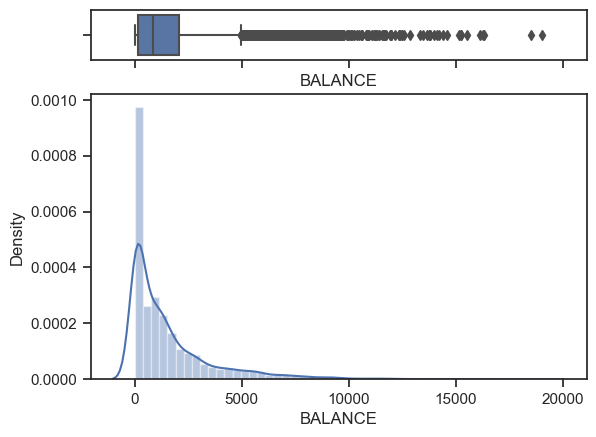

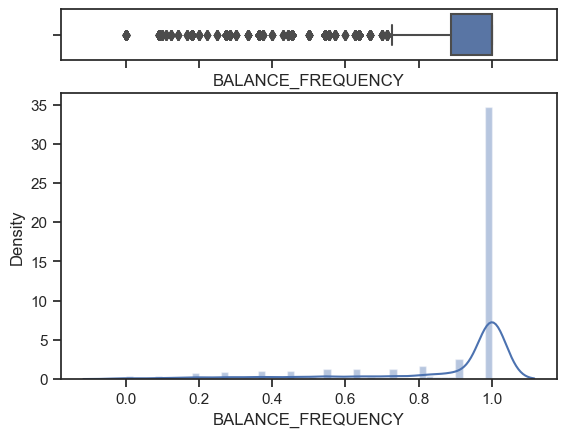

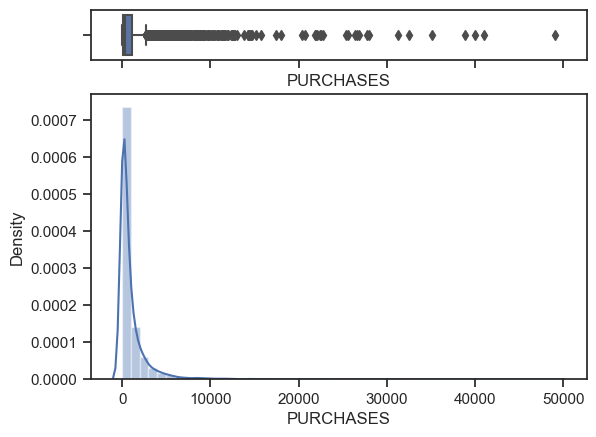

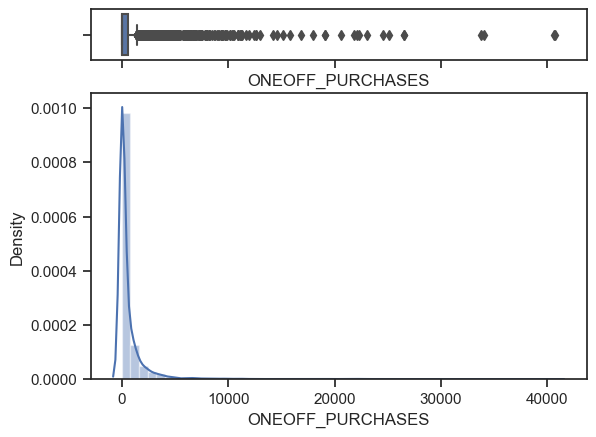

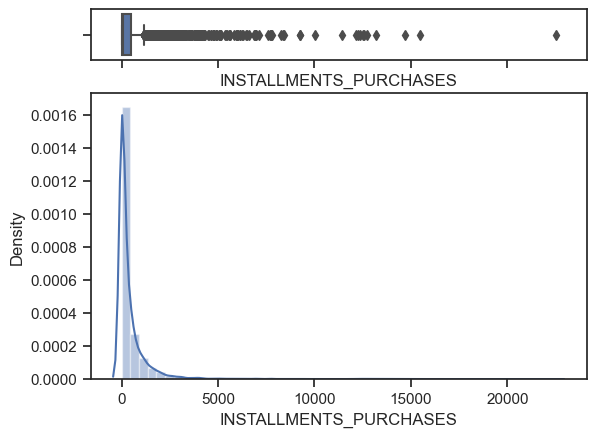

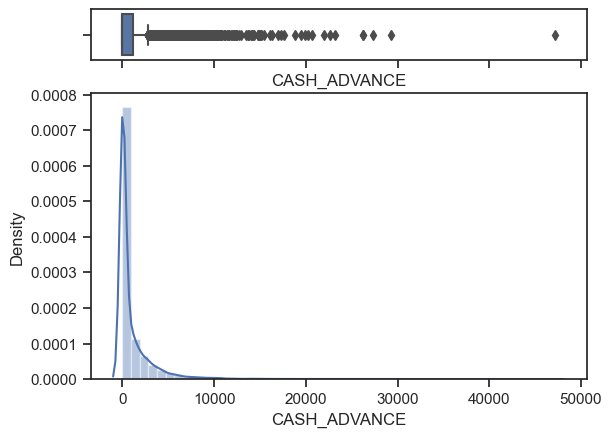

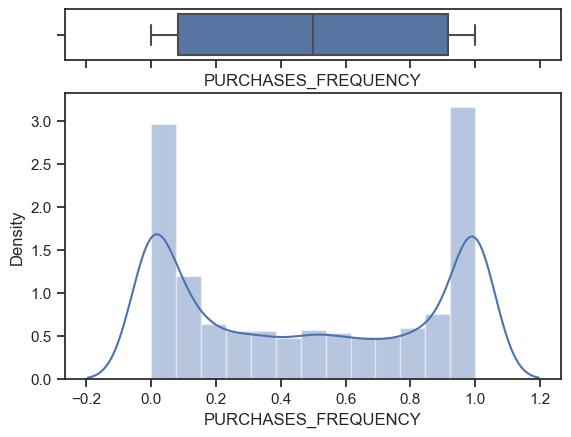

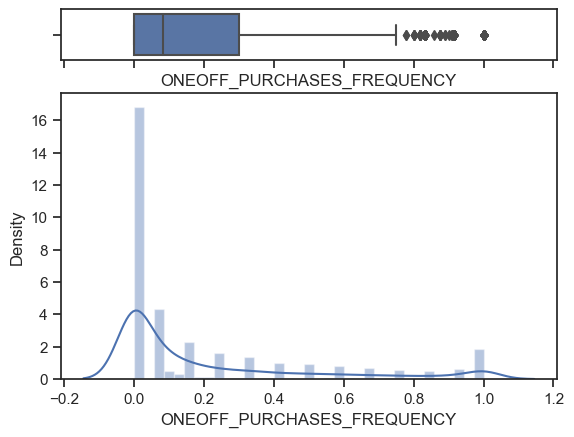

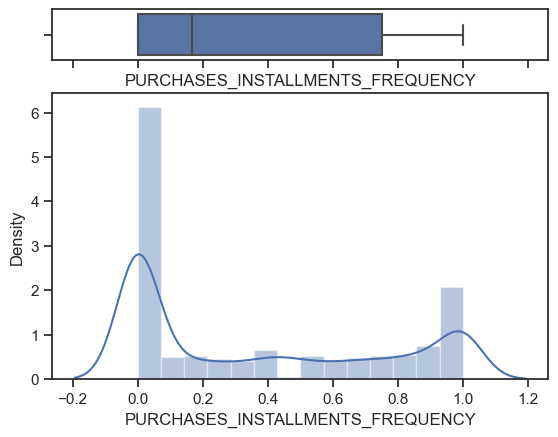

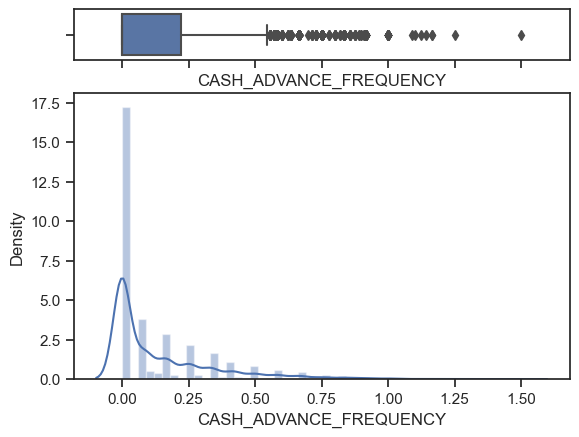

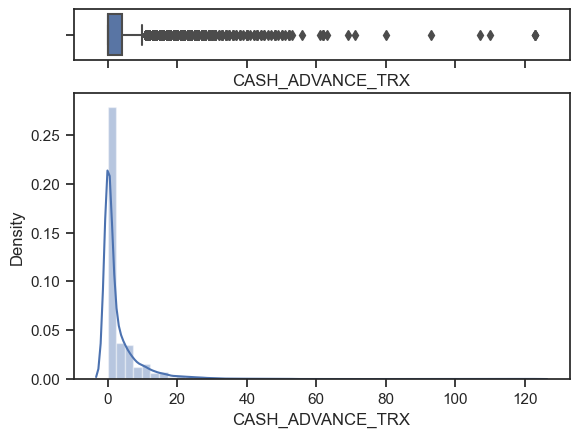

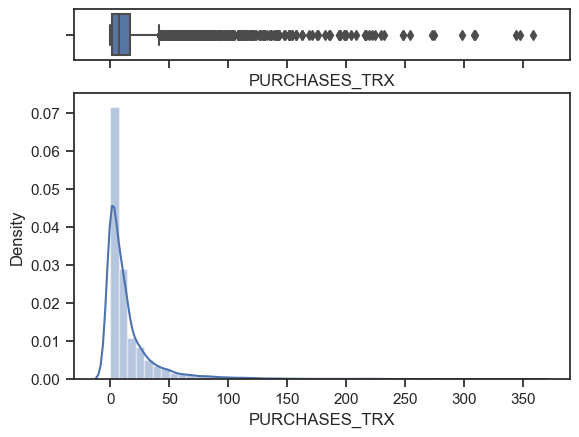

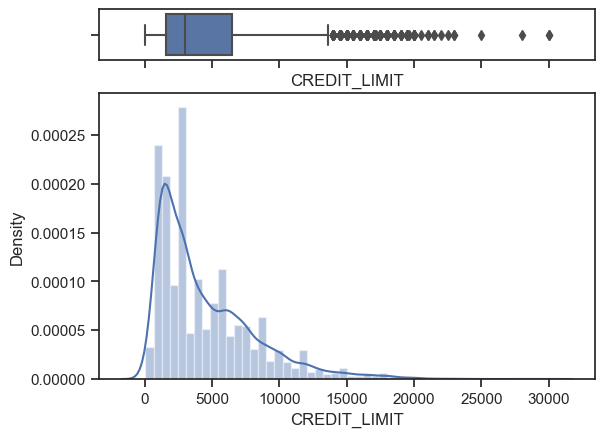

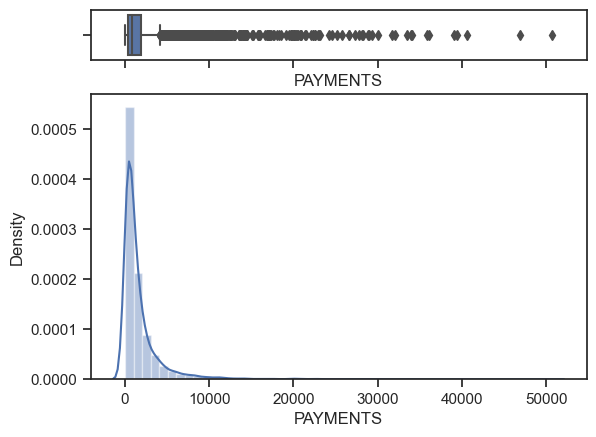

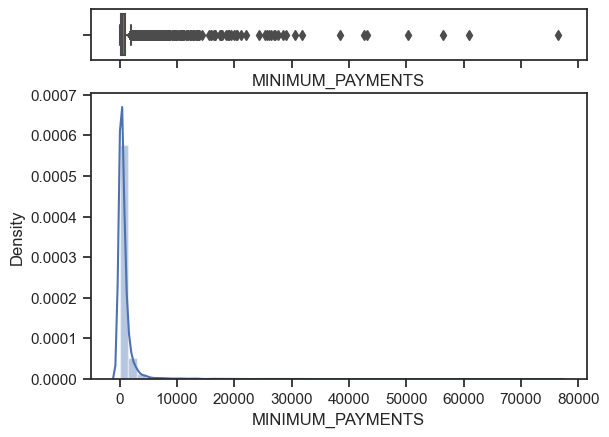

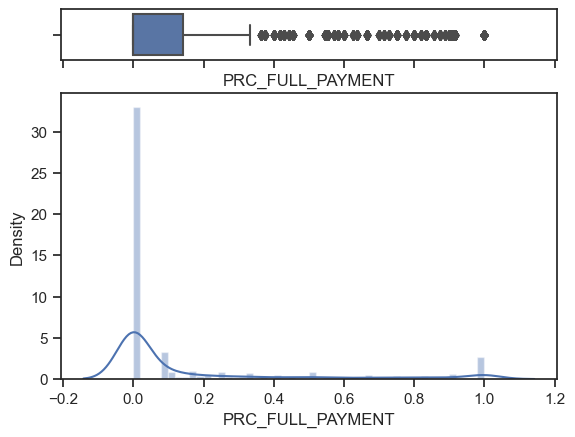

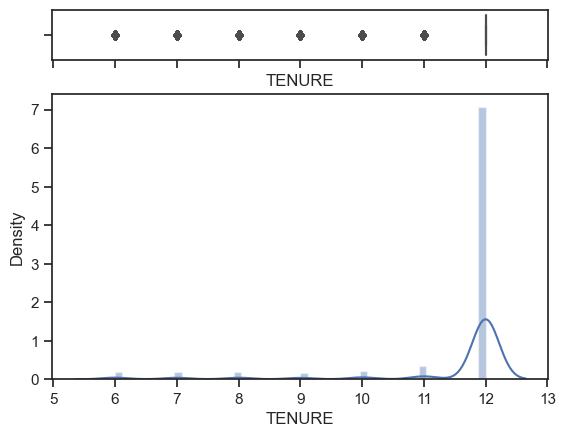

In [13]:
plt.figure(figsize=(20, 35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        f, (ax_box, ax_hist) = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        sns.boxplot(df[col], ax=ax_box)
        sns.distplot(df[col], ax=ax_hist)
        ax_box.set(xlabel=col)
plt.show()


In [14]:
# checking for number of unique values
df.nunique()

CUST_ID                             8949
BALANCE                             8870
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4322
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8710
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

<AxesSubplot:>

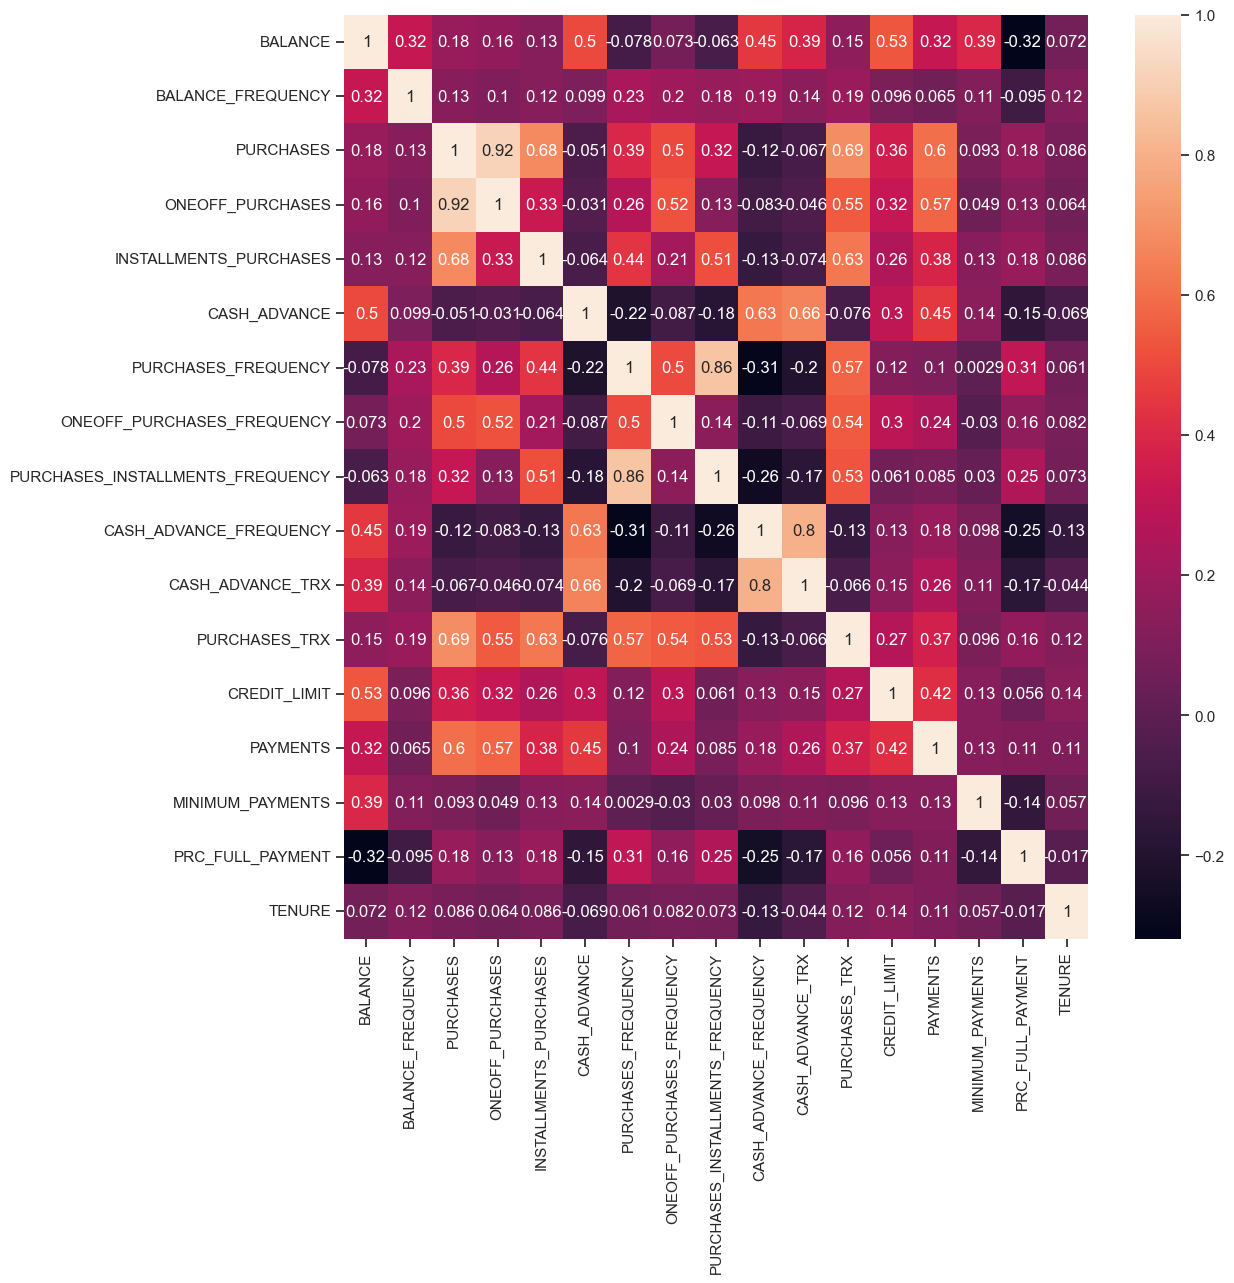

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)


### observation
some values are highly coerrelated
so we will use pca for dimension reductuion


In [16]:
# dropping columns not needed in our clustering
df.drop('CUST_ID',axis=1,inplace=True)

In [17]:
# checking the dataset shape
df.shape

(8949, 17)

In [18]:
# scaling the dataset
sc=StandardScaler()
scale=sc.fit_transform(df)

In [19]:
np.mean(scale)

-1.644028862821053e-17

In [20]:
np.std(scale)

1.0

In [21]:
#principal component decomposition
pca=PCA(n_components=2)
scaled=pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.4752906 , 0.17778982])

In [22]:
# checking for the final shape of our dataset that will be used in our clustering model

scaled.shape

(8949, 2)

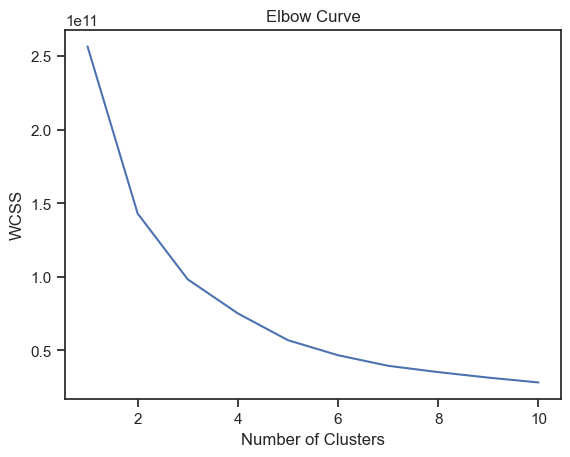

The elbow point is at 2 clusters


In [23]:

# initialize list to store WCSS values for different k values
wcss = []

# fit k-means clustering for different values of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=23)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
wcss2 = np.gradient(np.gradient(wcss))

# find the elbow point
elbow = np.argmax(wcss2) + 1

# plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
print('The elbow point is at', elbow, 'clusters')


In [24]:
# building clustering model using result gotten from the graph above
km=KMeans(n_clusters=3,random_state=46)
#fitting the model to
km.fit(scaled)

KMeans(n_clusters=3, random_state=46)

In [25]:
print('Silhoutte score of our model is ' + str(silhouette_score(scaled, kmeans.labels_)))

Silhoutte score of our model is 0.4152169050883538


<AxesSubplot:xlabel='BALANCE_FREQUENCY', ylabel='BALANCE'>

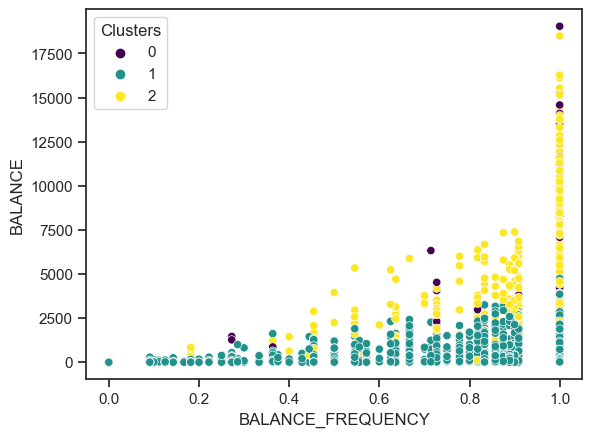

In [26]:
df['Clusters'] = km.labels_

<AxesSubplot:title={'center':'Distribution of clusters based on Credit limit and payment'}, xlabel='CREDIT_LIMIT', ylabel='PAYMENTS'>

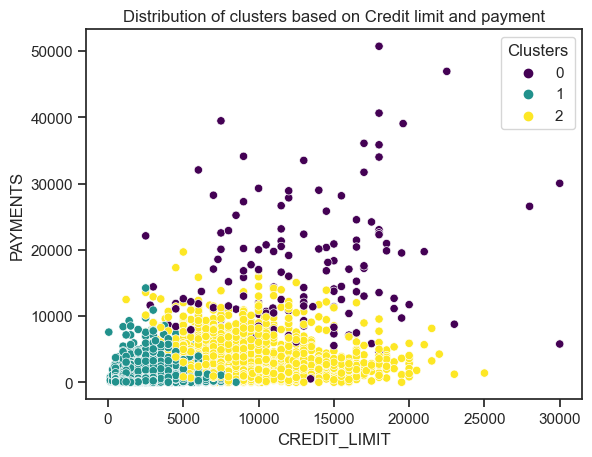

In [27]:
plt.title('Distribution of clusters based on Credit limit and payment')
sns.scatterplot(x="CREDIT_LIMIT",y="PAYMENTS",hue = 'Clusters', data=df,palette='viridis')

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

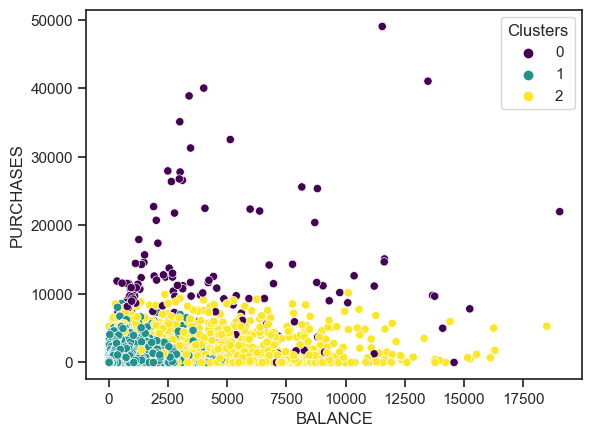

In [28]:
sns.scatterplot(x="BALANCE",y="PURCHASES",hue = 'Clusters', data=df,palette='viridis')

In [29]:
df['Clusters'].value_counts()

1    6591
2    2211
0     147
Name: Clusters, dtype: int64

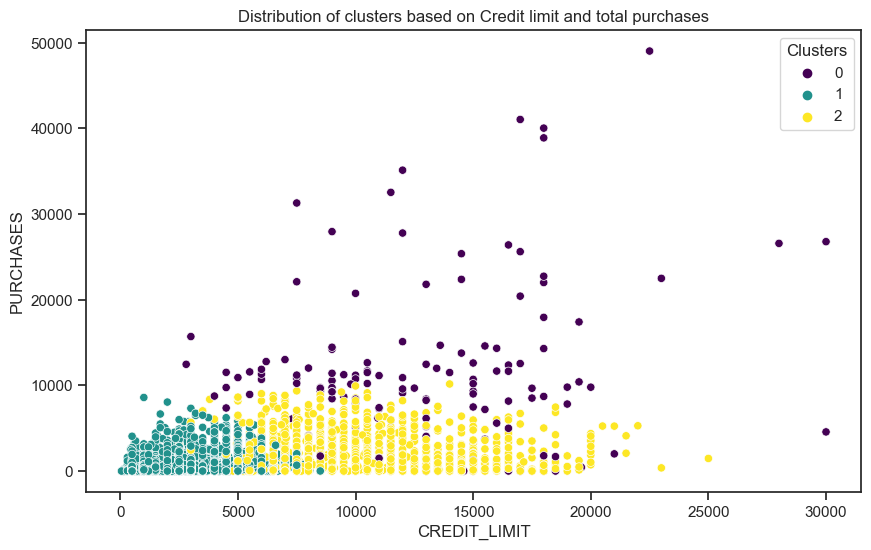

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='Clusters',palette='viridis')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

Text(0.5, 1.0, 'Distribution of clusters based on One off purchases and total purchases')

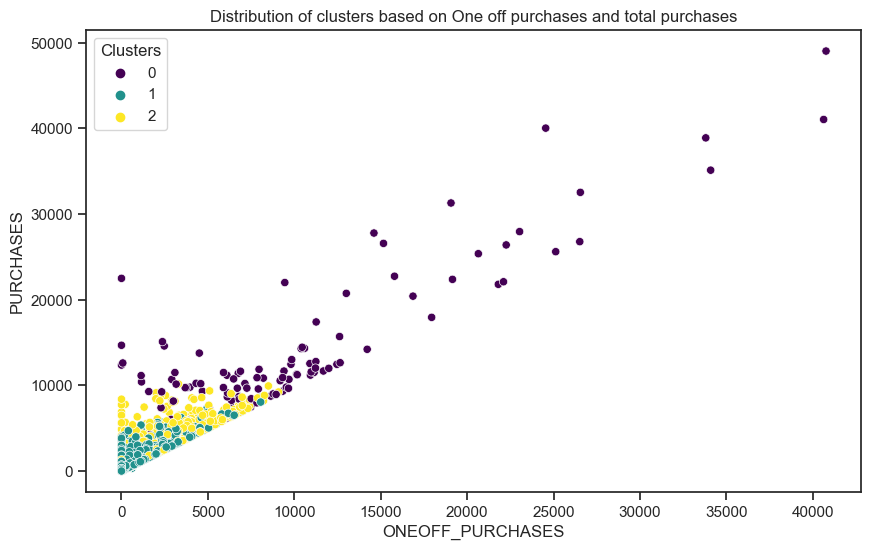

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='Clusters',palette='viridis')
plt.title('Distribution of clusters based on One off purchases and total purchases')

